# Mango Fruit Disease detection model

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout
from tensorflow.keras import layers

In [2]:
print(tf.__version__)

2.16.1


## create a dataset

In [3]:
# create a dataset

batch_size=32
img_height=180
img_width=180

path_train = "mango_dataset/train/"
train_image_dataset = tf.keras.utils.image_dataset_from_directory(
    path_train,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    validation_split=0.2,
    subset="training",
    seed=123,
)

path_validate = "mango_dataset/test/"
validate_image_dataset = tf.keras.utils.image_dataset_from_directory(
    path_validate,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    validation_split=0.2,
    subset="validation",
    seed=123,
    
)

class_names = train_image_dataset.class_names
class_name = {}
for i in range(len(class_names)):
    class_name[i + 1] = class_names[i]

print(class_names)
print(class_name)

Found 619 files belonging to 5 classes.
Using 496 files for training.
Found 249 files belonging to 5 classes.
Using 49 files for validation.
['Alternaria', 'Anthracnose', 'Black_Mould_Rot', 'Healthy', 'Stem_and_Rot']
{1: 'Alternaria', 2: 'Anthracnose', 3: 'Black_Mould_Rot', 4: 'Healthy', 5: 'Stem_and_Rot'}


##  Visualize the data

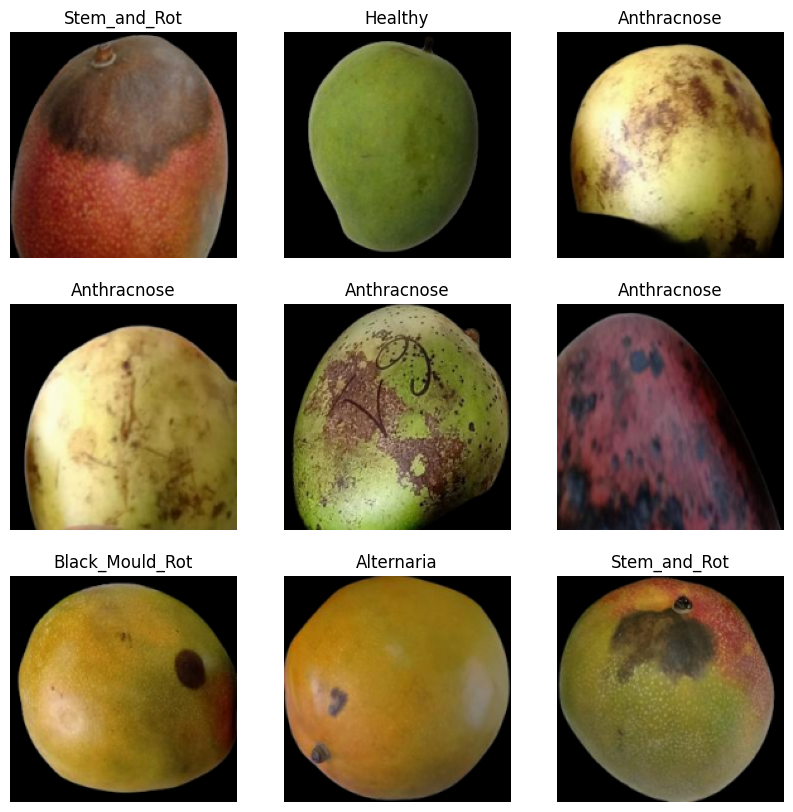

In [4]:
# Visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
count = 0  # Initialize a count to keep track of how many images have been plotted

for images, labels in train_image_dataset:
    for i in range(len(images)):  # Iterate over all available images in the batch
        if count >= 9:
            break  # Exit the loop if you've plotted 9 images
        ax = plt.subplot(3, 3, count + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        count += 1
    if count >= 9:
        break  # Exit the outer loop if you've plotted 9 images

plt.show()


In [5]:
for image_batch , labels_batch in train_image_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


##  creating CNN model

In [6]:
# creating model

num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

C:\Users\abhis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##  compile the model

In [7]:
# compile the model

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

##  Train the model

In [ ]:
# Train teh model

epochs=30
history = model.fit(
    train_image_dataset,
    validation_data=validate_image_dataset,
    epochs=epochs
)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 480ms/step - accuracy: 0.3273 - loss: 1.5446 - val_accuracy: 0.4490 - val_loss: 1.4710
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 373ms/step - accuracy: 0.6020 - loss: 0.9498 - val_accuracy: 0.4898 - val_loss: 1.3794
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 429ms/step - accuracy: 0.7377 - loss: 0.6984 - val_accuracy: 0.3878 - val_loss: 1.5619
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 456ms/step - accuracy: 0.7665 - loss: 0.5705 - val_accuracy: 0.5918 - val_loss: 1.2935
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - accuracy: 0.8416 - loss: 0.4512 - val_accuracy: 0.4898 - val_loss: 1.5160
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - accuracy: 0.8592 - loss: 0.3558 - val_accuracy: 0.5510 - val_loss: 1.7816
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.8815 - loss: 0.3359 - val_accuracy: 0.5918 - val_loss: 1.5116
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 463ms/step - accuracy: 0.9084 - loss: 0.2611 - val_accuracy: 0

##  Predict the new data

In [ ]:
path = "mango_dataset/test/Stem_and_Rot/Lasiodiplodia_111.jpg"

img = imread(path)
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
# predict the output

# path = "Cat_Dog/test/cats/cat_1.jpg"

img = image.load_img(path,target_size=(img_height,img_width))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
# img = preprocess_input(img)



prediction = model.predict(img)

predicted_class = np.argmax(prediction)

print(f"Predicted class : {predicted_class}")
print(f"Predict animal : {class_names[predicted_class]}")

In [ ]:
# Define the path where you want to save the model

model.save('Mango_Fruit_Detection_Model.h5')


In [ ]:
df = pd.read_csv("mango_dataset/Mango_fruit_dataset.csv")
df = df.replace('',np.nan)
df = df.dropna(axis="columns",how="any")


In [ ]:

Sn_no, Disease_Type, Severity, Location_Date ,Description ,Symptoms  ,Diagnosis ,Precautions = df.loc[predicted_class,:]

print("\n\n ******  Mango Fruit Disease Detection ******* \n")
print(f"Disease Type : {Disease_Type}\nSeverity : {Severity}\nDescription : {Description}\nSymptoms : {Symptoms}\nDiagnosis : {Diagnosis}\nPrecautions : {Precautions}")